# Module 13
## Pre-processing WEB data 

Get the data from a web page. **Note** that web pages are often internationalized to display messages and output in a variety of user-selectable languages. Therefore, Python needs to decode the web page into 'utf-8', which is Python internal code system.  
**html** is the output of this chink of code.

In [27]:
# 
import urllib
html = urllib.request.urlopen('http://python.org/').read().decode('utf-8')
print(len(html))
print(type(html))

49172
<class 'str'>


### 1. Without cleaning
What happens if I do not clean before tokenization?

In [28]:
# I split the web page in tokens
tokens = [tok for tok in html.split()]
print("Total no of tokens :", str(len(tokens)))
print(tokens[:100])   # print the first 100

Total no of tokens : 2897
['<!doctype', 'html>', '<!--[if', 'lt', 'IE', '7]>', '<html', 'class="no-js', 'ie6', 'lt-ie7', 'lt-ie8', 'lt-ie9">', '<![endif]-->', '<!--[if', 'IE', '7]>', '<html', 'class="no-js', 'ie7', 'lt-ie8', 'lt-ie9">', '<![endif]-->', '<!--[if', 'IE', '8]>', '<html', 'class="no-js', 'ie8', 'lt-ie9">', '<![endif]-->', '<!--[if', 'gt', 'IE', '8]><!--><html', 'class="no-js"', 'lang="en"', 'dir="ltr">', '<!--<![endif]-->', '<head>', '<meta', 'charset="utf-8">', '<meta', 'http-equiv="X-UA-Compatible"', 'content="IE=edge">', '<link', 'rel="prefetch"', 'href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">', '<meta', 'name="application-name"', 'content="Python.org">', '<meta', 'name="msapplication-tooltip"', 'content="The', 'official', 'home', 'of', 'the', 'Python', 'Programming', 'Language">', '<meta', 'name="apple-mobile-web-app-title"', 'content="Python.org">', '<meta', 'name="apple-mobile-web-app-capable"', 'content="yes">', '<meta', 'name="apple-mobile-web-

This is what our token's list looks like without cleaning.

## 2. Split over non-words elements with re.split()
Using re with the reg expression '\W+' for the split, Python splits the text over the non-word elements.

In [29]:
# Use a different split on non-words elements
import re
tokens = re.split('\W+',html)
print("Total no of tokens :", str(len(tokens)))
print(tokens[:100])

Total no of tokens : 6207
['', 'doctype', 'html', 'if', 'lt', 'IE', '7', 'html', 'class', 'no', 'js', 'ie6', 'lt', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '7', 'html', 'class', 'no', 'js', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '8', 'html', 'class', 'no', 'js', 'ie8', 'lt', 'ie9', 'endif', 'if', 'gt', 'IE', '8', 'html', 'class', 'no', 'js', 'lang', 'en', 'dir', 'ltr', 'endif', 'head', 'meta', 'charset', 'utf', '8', 'meta', 'http', 'equiv', 'X', 'UA', 'Compatible', 'content', 'IE', 'edge', 'link', 'rel', 'prefetch', 'href', 'ajax', 'googleapis', 'com', 'ajax', 'libs', 'jquery', '1', '8', '2', 'jquery', 'min', 'js', 'meta', 'name', 'application', 'name', 'content', 'Python', 'org', 'meta', 'name', 'msapplication', 'tooltip', 'content', 'The', 'official']


This is better than the first try (1.). The problem with the non-clean + split over non-words approach is that we have a lot of HTML tags counted as words.

## 3. Cleaning HTML with Beautifulsoup + normal split()
Beautifoulsoup has the get_text() that strips the HTML tags off out text.

In [30]:
# Clean with Bs4
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
clean = soup.get_text(strip=True)
tokens = [tok for tok in clean.split()]
print(tokens[:100])

['Welcome', 'to', 'Python.orgNotice:While', 'Javascript', 'is', 'not', 'essential', 'for', 'this', 'website,', 'your', 'interaction', 'with', 'the', 'content', 'will', 'be', 'limited.', 'Please', 'turn', 'Javascript', 'on', 'for', 'the', 'full', 'experience.Skip', 'to', 'content▼ClosePythonPSFDocsPyPIJobsCommunity▲The', 'Python', 'NetworkDonate≡MenuSearch', 'This', 'SiteGOAASmallerLargerResetSocializeFacebookTwitterChat', 'on', 'IRCAboutApplicationsQuotesGetting', 'StartedHelpPython', 'BrochureDownloadsAll', 'releasesSource', 'codeWindowsMac', 'OS', 'XOther', 'PlatformsLicenseAlternative', 'ImplementationsDocumentationDocsAudio/Visual', "TalksBeginner's", "GuideDeveloper's", 'GuideFAQNon-English', 'DocsPEP', 'IndexPython', 'BooksPython', 'EssaysCommunityCommunity', 'SurveyDiversityMailing', 'ListsIRCForumsPSF', 'Annual', 'Impact', 'ReportPython', 'ConferencesSpecial', 'Interest', 'GroupsPython', 'LogoPython', 'WikiMerchandiseCommunity', 'AwardsCode', 'of', 'ConductSuccess', 'StoriesArt

Now we can see some improvement. But still is not perfect.

## 4. Cleaning with Beautifulsoup + re.split()

In [31]:
# Still use BS4 for cleaning
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
clean = soup.get_text(strip=True)
# Now use re.split()
tokens = re.split('\W+',html)
print(tokens[:100])

['', 'doctype', 'html', 'if', 'lt', 'IE', '7', 'html', 'class', 'no', 'js', 'ie6', 'lt', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '7', 'html', 'class', 'no', 'js', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '8', 'html', 'class', 'no', 'js', 'ie8', 'lt', 'ie9', 'endif', 'if', 'gt', 'IE', '8', 'html', 'class', 'no', 'js', 'lang', 'en', 'dir', 'ltr', 'endif', 'head', 'meta', 'charset', 'utf', '8', 'meta', 'http', 'equiv', 'X', 'UA', 'Compatible', 'content', 'IE', 'edge', 'link', 'rel', 'prefetch', 'href', 'ajax', 'googleapis', 'com', 'ajax', 'libs', 'jquery', '1', '8', '2', 'jquery', 'min', 'js', 'meta', 'name', 'application', 'name', 'content', 'Python', 'org', 'meta', 'name', 'msapplication', 'tooltip', 'content', 'The', 'official']


And this outcome looks not too bad. Still, I have some HTML and Javascript tags over there.

## 5. Let's calc the frequency of the outcome of the last step (4.)

In [32]:
import operator
freq_dis={}
for tok in tokens:
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1
# We want to sort this dictionary on values ( freq in this case )
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)
# Print the top 25 most frequen terms
print(sorted_freq_dist[:25])  

[('a', 429), ('class', 362), ('li', 322), ('href', 222), ('title', 151), ('span', 144), ('2', 143), ('tier', 134), ('element', 132), ('role', 130), ('treeitem', 113), ('div', 98), ('Python', 87), ('python', 83), ('org', 64), ('1', 56), ('ul', 56), ('3', 52), ('p', 48), ('https', 42), ('http', 40), ('aria', 39), ('true', 37), ('menu', 37), ('code', 36)]


I still see HTML and Javascript tags here.

## 6. Specialized HTML cleaners
The function below was included in older versions of NLTK. Now, NLTK's advice is to use BS4, as we did. However, the best result comes with their old function. See below. 

In [33]:
def clean_html(html):
    """
    Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()


Here I clean the raw html with the specialized cleaner. Note that I use the simplest tokenizer, split().

In [34]:
clean = clean_html(html)
tokens = [tok for tok in clean.split()]
print(tokens[:100])

['Welcome', 'to', 'Python.org', 'Notice:', 'While', 'Javascript', 'is', 'not', 'essential', 'for', 'this', 'website,', 'your', 'interaction', 'with', 'the', 'content', 'will', 'be', 'limited.', 'Please', 'turn', 'Javascript', 'on', 'for', 'the', 'full', 'experience.', 'Skip', 'to', 'content', '&#9660;', 'Close', 'Python', 'PSF', 'Docs', 'PyPI', 'Jobs', 'Community', '&#9650;', 'The', 'Python', 'Network', 'Donate', '&equiv;', 'Menu', 'Search', 'This', 'Site', 'GO', 'A', 'A', 'Smaller', 'Larger', 'Reset', 'Socialize', 'Facebook', 'Twitter', 'Chat', 'on', 'IRC', 'About', 'Applications', 'Quotes', 'Getting', 'Started', 'Help', 'Python', 'Brochure', 'Downloads', 'All', 'releases', 'Source', 'code', 'Windows', 'Mac', 'OS', 'X', 'Other', 'Platforms', 'License', 'Alternative', 'Implementations', 'Documentation', 'Docs', 'Audio/Visual', 'Talks', 'Beginner&#39;s', 'Guide', 'Developer&#39;s', 'Guide', 'FAQ', 'Non-English', 'Docs', 'PEP', 'Index', 'Python', 'Books', 'Python', 'Essays']


And this looks way better. I don't see too much noise. Let's calculate and print the frequency.

## 6.A. NLTK Tokenizer
Another tokenizer is NLTK tokenizer. It does a better job in distinguishing words and punctuation, for example.

In [35]:
import nltk
clean = clean_html(html)
tokens = nltk.word_tokenize(clean)
print(tokens[:100])

['Welcome', 'to', 'Python.org', 'Notice', ':', 'While', 'Javascript', 'is', 'not', 'essential', 'for', 'this', 'website', ',', 'your', 'interaction', 'with', 'the', 'content', 'will', 'be', 'limited', '.', 'Please', 'turn', 'Javascript', 'on', 'for', 'the', 'full', 'experience', '.', 'Skip', 'to', 'content', '&', '#', '9660', ';', 'Close', 'Python', 'PSF', 'Docs', 'PyPI', 'Jobs', 'Community', '&', '#', '9650', ';', 'The', 'Python', 'Network', 'Donate', '&', 'equiv', ';', 'Menu', 'Search', 'This', 'Site', 'GO', 'A', 'A', 'Smaller', 'Larger', 'Reset', 'Socialize', 'Facebook', 'Twitter', 'Chat', 'on', 'IRC', 'About', 'Applications', 'Quotes', 'Getting', 'Started', 'Help', 'Python', 'Brochure', 'Downloads', 'All', 'releases', 'Source', 'code', 'Windows', 'Mac', 'OS', 'X', 'Other', 'Platforms', 'License', 'Alternative', 'Implementations', 'Documentation', 'Docs', 'Audio/Visual', 'Talks', 'Beginner']


### Frequency 

In [36]:
import operator
freq_dis={}
for tok in tokens:
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1
# We want to sort this dictionary on values ( freq in this case )
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_dist[:25])

[('>', 66), (',', 63), ('Python', 59), (';', 27), ('&', 26), ('and', 23), ('(', 22), (')', 22), ('.', 21), (':', 19), ('#', 18), ('the', 17), ('to', 15), ('of', 14), ("'", 14), ('for', 13), ('3', 13), ('is', 12), ('News', 11), ('Events', 11), ('a', 11), ('2020-', 10), ('with', 9), ('PSF', 9), ('Community', 9)]


Now this result makes sense. The most common term is 'Python', that makes sense for the Python.org webpage.  Notice that the second term is a stop-word, 'and'. We need to take care of that later.

## 7. NLTK   freq_dist()

In [37]:
# We can use the NLTK.freq_dist 
import nltk
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
i = 0
for k,v in Freq_dist_nltk.items():
    print(str(k)+':'+str(v))
    i += 1
    if i==15: break

<FreqDist with 521 samples and 1347 outcomes>
Welcome:1
to:15
Python.org:1
Notice:1
::19
While:1
Javascript:2
is:12
not:1
essential:1
for:13
this:1
website:1
,:63
your:4


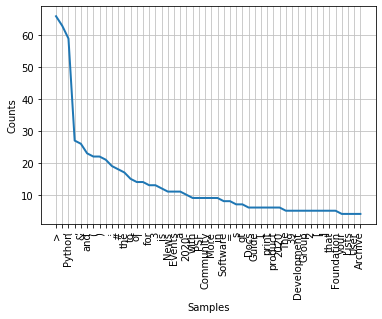

In [38]:
# The coolest part is that NLTK offers a frequency plot
Freq_dist_nltk.plot(50, cumulative=False)

## 8. Stop Words

In [39]:
# Get the list of Stop-words from NLTK
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

179
{'i', 's', 'other', "doesn't", 'through', 've', 'theirs', 'am', 'won', 'hadn', 'him', 'below', 'both', 'those', 'weren', 'up', 'not', 'about', 'then', 'out', 'been', 'and', 'such', 'these', 'what', 'few', 't', 'being', 'if', 'after', 'there', "hasn't", 'are', 'of', 'will', 'whom', 'because', 'y', "that'll", 'a', "wouldn't", 'only', 'it', 'with', 'own', "haven't", 'can', 'he', 'wouldn', 'while', 'yourself', 'was', 'wasn', 'hasn', 'aren', 'more', "shouldn't", 'shouldn', 'is', 'than', "you've", 'but', 'does', 'its', 'she', 'm', 'as', 'against', 'ourselves', 'were', 'we', "couldn't", "mustn't", "needn't", 'have', 'didn', 'this', "don't", 'myself', 'you', 'having', 'doesn', 'most', "wasn't", 'has', 'had', 're', 'yourselves', "you'd", 'into', 'so', 'd', 'couldn', "won't", 'an', 'above', 'over', 'again', 'o', 'when', 'on', 'should', "she's", 'during', 'did', 'now', 'very', 'ma', "it's", 'hers', 'further', "mightn't", 'doing', 'be', 'll', 'her', 'all', 'that', "didn't", 'just', 'their', 'f

## 9. Remove stopwords

In [40]:
# simple list comprehension to remove the stopwords from my list of tokens
clean_tokens=[tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stopWords)]

In [41]:
# Let's print the 25 most frequent terms
import operator
freq_dis={}
for tok in clean_tokens:
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1
# We want to sort this dictionary on values ( freq in this case )
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_dist[:25])

[('Python', 59), ('News', 11), ('Events', 11), ('2020-', 10), ('PSF', 9), ('Community', 9), ('Software', 8), ('gt', 7), ('Docs', 6), ('Guide', 6), ('print', 6), ('product', 6), ('2020', 6), ('39', 5), ('Development', 5), ('Group', 5), ('Foundation', 5), ('Lists', 4), ('User', 4), ('Archive', 4), ('programming', 4), ('functions', 4), ('name', 4), ('9650', 3), ('IRC', 3)]


It looks good. The noise is at the minimum.   
In any case, you can append any **noisy term** to the stopwords list and filter again.

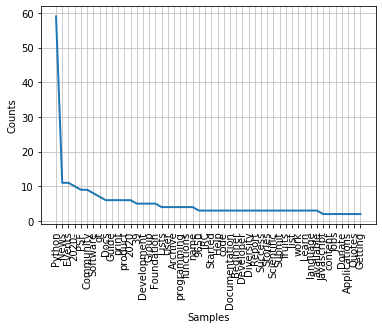

In [42]:
# Let's plot again
Freq_dist_nltk=nltk.FreqDist(clean_tokens)
Freq_dist_nltk.plot(50, cumulative=False)

# 10.  Full Code of the "Best" Outcome
Remember that "best" depends upon your data. Sometimes you need more cleaning, sometimes less.

In [ ]:
# Step 1 - Get the Data
import urllib
html = urllib.request.urlopen('http://python.org/').read().decode('utf-8')

# Step 2 - Clean the Data from HTML Tags
def clean_html(html):
    """
    Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()

clean = clean_html(html)
tokens = nltk.word_tokenize(clean)

# Step 3 - Eliminate stopwords
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
clean_tokens=[tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stopWords)]

# Step 4 - Frequency Calculation
import operator
freq_dis={}
for tok in clean_tokens:
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1
# We want to sort this dictionary on values ( freq in this case )
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_dist[:25])

# Step 4 - Plot the frequency
Freq_dist_nltk=nltk.FreqDist(clean_tokens)
Freq_dist_nltk.plot(25, cumulative=False)